## Will test methods to usefully read and compile results from multiple events


In [1]:
# create a loop to work over all data directories
import os
import pandas as pd
import glob
from numpy import log10
import pickle
import numpy as np

from rtergpy.run import defaults
Defaults=defaults()

edirbase=Defaults.edirbase

from matplotlib import pylab as plt
%matplotlib inline

In [2]:
#iterate through all the per-station solutions
#for root, dirs, files in os.walk('/home/ljaffe7/Rtergpy/rterg_events/events/2021/2021011100/00',topdown=True):
df_allwfresults=pd.DataFrame()
df_focmech=pd.DataFrame()

for root, dirs, files in os.walk(edirbase,topdown=True):
    for file in files:
        if file.startswith("Results_") and file.endswith(".pkl"): # only iterate on root that have files like Results_*.pkl
            for root1,dirs1,files1 in os.walk(root,topdown=True): # iterate through all dir (called root) to find specific pkl files
                    for file1 in files1: 
                        if file1.startswith("Etacer_") and file1.endswith(".pkl"):
                            perstationfile=os.path.join(root,file1)
                        elif file1.startswith("Results_") and file1.endswith(".pkl"):
                            resultsfile=os.path.join(root,file1)
                    df_result=pd.read_pickle(resultsfile)
                    ebbcorrpertacmean=df_result["ebbcorrpertacmean"][0]
                        
                    df_perstation=pd.read_pickle(perstationfile)
                    df_perstation['ebbcorrpertacmean']=ebbcorrpertacmean
                    df_perstation['eventname']=df_result["eventname"][0]
                    df_perstation['elat']=df_result["elat"][0]
                    df_perstation['elon']=df_result["elon"][0]
                    df_perstation['edepth']=df_result["edepth"][0] 
                    df_perstation['strike']=df_result["focmech"][0][0]
                    df_perstation['dip']=df_result["focmech"][0][1]
                    df_perstation['rake']=df_result["focmech"][0][2]
                    df_perstation['dist_meters']=df_perstation["distance"][0][0]
                    df_perstation['dist_degrees']=df_perstation["distance"][0][1]
    

                    
                    df_perstation['ebbcorrpertaclognorm']=log10(df_perstation['ebbcorrpertac']/ebbcorrpertacmean)
                    
                    
                    df_allwfresults=pd.concat([df_allwfresults,df_perstation],ignore_index=True)
                    df_allwfresults.to_pickle("0290results.pkl")
                    

/home/ljaffe7/anaconda3/envs/rtergpy/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ljaffe7/anaconda3/envs/rtergpy/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ljaffe7/anaconda3/envs/rtergpy/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ljaffe7/anaconda3/envs/rtergpy/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [3]:
pd.set_option('display.max_columns', None)
df_allwfresults



,netstatchan,network,station,location,channel,starttime,endtime,phasePtime,sampling_rate,delta,npts,calib,az,baz,coordinates,distance,pinc,prayp,ptoa,estFgP2,FgP2,est2corr,tacer,ebbmedtac,ehfmedtac,ebbcorrmedtac,ehfcorrmedtac,ebbpertac,ehfpertac,ebbcorrpertac,ehfcorrpertac,ebbcorrpertacmean,eventname,elat,elon,edepth,strike,dip,rake,dist_meters,dist_degrees,ebbcorrpertaclognorm
0,AM.R830A.00.EHZ,AM,R830A,00,EHZ,2022-05-26T15:43:17.841999Z,2022-05-26T15:49:03.581999Z,2022-05-26T15:44:17.839300Z,100.0,0.01,34575,1.0,240.014075,76.636972,"[-34.9009009, 138.6378432]","[3511818.359903794, 31.546282636015775]",27.270322,503.297141,31.05389,1.000468,0.33701,2.96866,36,6.118509e+29,3.546207e+29,1.816377e+30,1.052749e+30,6.002335e+29,3.437388e+29,1.781889e+30,1.020444e+30,NaN,2022052601,-22.81,172.14,29.1,277,33,90,3.511818e+06,31.546283,NaN
1,AM.R9CDF.00.EHZ,AM,R9CDF,00,EHZ,2022-05-26T15:42:42.301999Z,2022-05-26T15:48:42.301999Z,2022-05-26T15:43:42.299359Z,100.0,0.01,36001,1.0,230.439282,64.338401,"[-38.01801802, 145.2965215]","[3063212.8018230204, 27.535286757106846]",27.867992,513.454306,31.75273,1.015386,0.277504,3.658993,55,4.107885e+14,1.796308e+12,1.503072e+15,6.572678e+12,4.550283e+14,3.321385e+12,1.664945e+15,1.215293e+13,NaN,2022052601,-22.81,172.14,29.1,277,33,90,3.511818e+06,31.546283,NaN
2,AM.RAA90.00.EHZ,AM,RAA90,00,EHZ,2022-05-26T15:42:40.225000Z,2022-05-26T15:48:40.225000Z,2022-05-26T15:43:40.227010Z,100.0,0.01,36001,1.0,221.543111,54.536006,"[-41.42342342, 148.2722338]","[3035625.2134195776, 27.3042191266884]",27.91574,514.263362,31.80862,1.016304,0.258861,3.92606,51,2.269950e+14,1.744706e+12,8.911960e+14,6.849821e+12,2.496985e+14,2.610487e+12,9.803312e+14,1.024893e+13,NaN,2022052601,-22.81,172.14,29.1,277,33,90,3.511818e+06,31.546283,NaN
3,AM.RB079.00.EHZ,AM,RB079,00,EHZ,2022-05-26T15:42:36.289000Z,2022-05-26T15:48:36.289000Z,2022-05-26T15:43:36.290982Z,100.0,0.01,36001,1.0,310.413555,135.238864,"[-4.288288288, 152.0119884]","[2982456.0157654737, 26.866319331439303]",28.002072,515.725303,31.909699,1.018062,1.225148,0.83097,39,7.043503e+15,1.149672e+14,5.852942e+15,9.553429e+13,7.062599e+15,1.176001e+14,5.868810e+15,9.772220e+13,NaN,2022052601,-22.81,172.14,29.1,277,33,90,3.511818e+06,31.546283,NaN
4,AM.RC74C.00.EHZ,AM,RC74C,00,EHZ,2022-05-26T15:42:52.121000Z,2022-05-26T15:48:52.121000Z,2022-05-26T15:43:52.125055Z,100.0,0.01,36001,1.0,244.760611,79.198898,"[-31.95495495, 141.4405111]","[3188296.1948399195, 28.636011832103193]",27.626445,509.35598,31.470127,1.011099,0.35509,2.847444,26,6.609119e+15,1.240719e+13,1.881909e+16,3.532878e+13,4.806554e+15,9.604259e+12,1.368639e+16,2.734759e+13,NaN,2022052601,-22.81,172.14,29.1,277,33,90,3.511818e+06,31.546283,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20678,AM.S2D97.00.EHZ,AM,S2D97,00,EHZ,2021-01-11T21:37:36.692000Z,2021-01-11T21:43:36.692000Z,2021-01-11T21:38:36.693417Z,100.0,0.01,36001,1.0,215.616837,24.392683,"[28.06306306, 83.25088716]","[2954773.0920904893, 26.587389915813343]",28.068447,516.848497,28.135272,1.019194,1.186112,0.859273,17,1.919146e+15,1.447292e+14,1.649070e+15,1.243619e+14,1.832762e+15,1.306177e+14,1.574842e+15,1.122363e+14,3.278537e+15,2021011100,51.32,100.39,13.9,355,43,-143,6.225821e+06,55.819684,-0.318443
20679,AM.S4458.00.EHZ,AM,S4458,00,EHZ,2021-01-11T21:37:11.884000Z,2021-01-11T21:43:11.884000Z,2021-01-11T21:38:11.883563Z,100.0,0.01,36001,1.0,116.975589,315.884972,"[36.79279279, 127.1160104]","[2656562.6724434416, 23.85654257449571]",28.475164,523.715718,28.543136,1.030768,1.457816,0.707063,19,2.810667e+14,8.329267e+12,1.987318e+14,5.889316e+12,2.790040e+14,7.724383e+12,1.972734e+14,5.461624e+12,3.278537e+15,2021011100,51.32,100.39,13.9,355,43,-143,6.225821e+06,55.819684,-1.220612
20680,AM.S8086.00.EHZ,AM,S8086,00,EHZ,2021-01-11T21:37:30.858999Z,2021-01-11T21:43:30.858999Z,2021-01-11T21:38:30.854831Z,100.0,0.01,36001,

In [39]:
#need to load pickle into notebook first

pickle_in = open("wfresults","rb")
example_dict = pickle.load(pickle_in)

#df_wf=pd.read_pickle(wfresults)

FileNotFoundError: [Errno 2] No such file or directory: 'wfresults'

<Figure size 432x288 with 0 Axes>

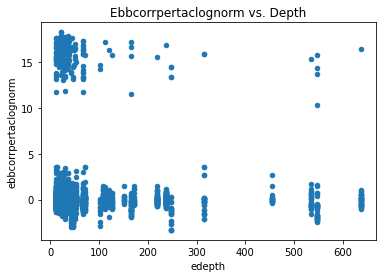

In [6]:
plt.figure()
df_allwfresults.plot(x ='edepth', y='ebbcorrpertaclognorm', kind = 'scatter')
plt.title('Ebbcorrpertaclognorm vs. Depth')
plt.show()

In [10]:
df = pd.read_pickle('Results1.pkl')
df

,netstatchan,network,station,location,channel,starttime,endtime,phasePtime,sampling_rate,delta,...,ehfcorrpertac,ebbcorrpertacmean,eventname,elat,elon,edepth,strike,dip,rake,ebbcorrpertaclognorm
0,AM.R830A.00.EHZ,AM,R830A,00,EHZ,2022-05-26T15:43:17.841999Z,2022-05-26T15:49:03.581999Z,2022-05-26T15:44:17.839300Z,100.0,0.01,...,1.020444e+30,NaN,2022052601,-22.81,172.14,29.1,277,33,90,NaN
1,AM.R9CDF.00.EHZ,AM,R9CDF,00,EHZ,2022-05-26T15:42:42.301999Z,2022-05-26T15:48:42.301999Z,2022-05-26T15:43:42.299359Z,100.0,0.01,...,1.215293e+13,NaN,2022052601,-22.81,172.14,29.1,277,33,90,NaN
2,AM.RAA90.00.EHZ,AM,RAA90,00,EHZ,2022-05-26T15:42:40.225000Z,2022-05-26T15:48:40.225000Z,2022-05-26T15:43:40.227010Z,100.0,0.01,...,1.024893e+13,NaN,2022052601,-22.81,172.14,29.1,277,33,90,NaN
3,AM.RB079.00.EHZ,AM,RB079,00,EHZ,2022-05-26T15:42:36.289000Z,2022-05-26T15:48:36.289000Z,2022-05-26T15:43:36.290982Z,100.0,0.01,...,9.772220e+13,NaN,2022052601,-22.81,172.14,29.1,277,33,90,NaN
4,AM.RC74C.00.EHZ,AM,RC74C,00,EHZ,2022-05-26T15:42:52.121000Z,2022-05-26T15:48:52.121000Z,2022-05-26T15:43:52.125055Z,100.0,0.01,...,2.734759e+13,NaN,2022052601,-22.81,172.14,29.1,277,33,90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,AM.RFCB2.00.EHZ,AM,RFCB2,00,EHZ,2021-01-11T21:37:34.910999Z,2021-01-11T21:43:34.910999Z,2021-01-11T21:38:34.910217Z,100.0,0.01,...,6.611414e+13,1.843263e+15,2021011100,51.32,100.39,13.9,355,43,-143,-0.315225
5109,AM.RFEFB.00.EHZ,AM,RFEFB,00,EHZ,2021-01-11T21:40:31.821999Z,2021-01-11T21:46:31.821999Z,2021-01-11T21:41:31.820223Z,100.0,0.01,...,2.640685e+29,1.843263e+15,2021011100,51.32,100.39,13.9,355,43,-143,15.921517
5110,AM.S2D97.00.EHZ,AM,S2D97,00,EHZ,2021-01-11T21:37:36.692000Z,2021-01-11T21:43:36.692000Z,2021-01-11T21:38:36.693417Z,100.0,0.01,...,1.122363e+14,1.843263e+15,2021011100,51.32,100.39,13.9,355,43,-143,-0.068350
5111,AM.S8086.00.EHZ,AM,S8086,00,EHZ,2021-01-11T21:37:30.858999Z,2021-01-11T21:43:30.858999Z,2021-01-11T21:38:30.854831Z,100.0,0.01,...,5.296463e+13,1.843263e+15,2021011100,51.32,100.39,13.9,355,43,-143,-0.131320
